In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')

In [6]:
data.head(100)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
95,96,163.3,31.6,52.9,16.9
96,97,197.6,3.5,5.9,11.7
97,98,184.9,21.0,22.0,15.5
98,99,289.7,42.3,51.2,25.4


In [7]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
data.shape

(200, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# Data Cleaning : delete unwanted feature by column wise

In [10]:
df=data.drop("Unnamed: 0",axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# No missing value or null value is there in dataset. 

In [ ]:
# Now analyse how data is distributed

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

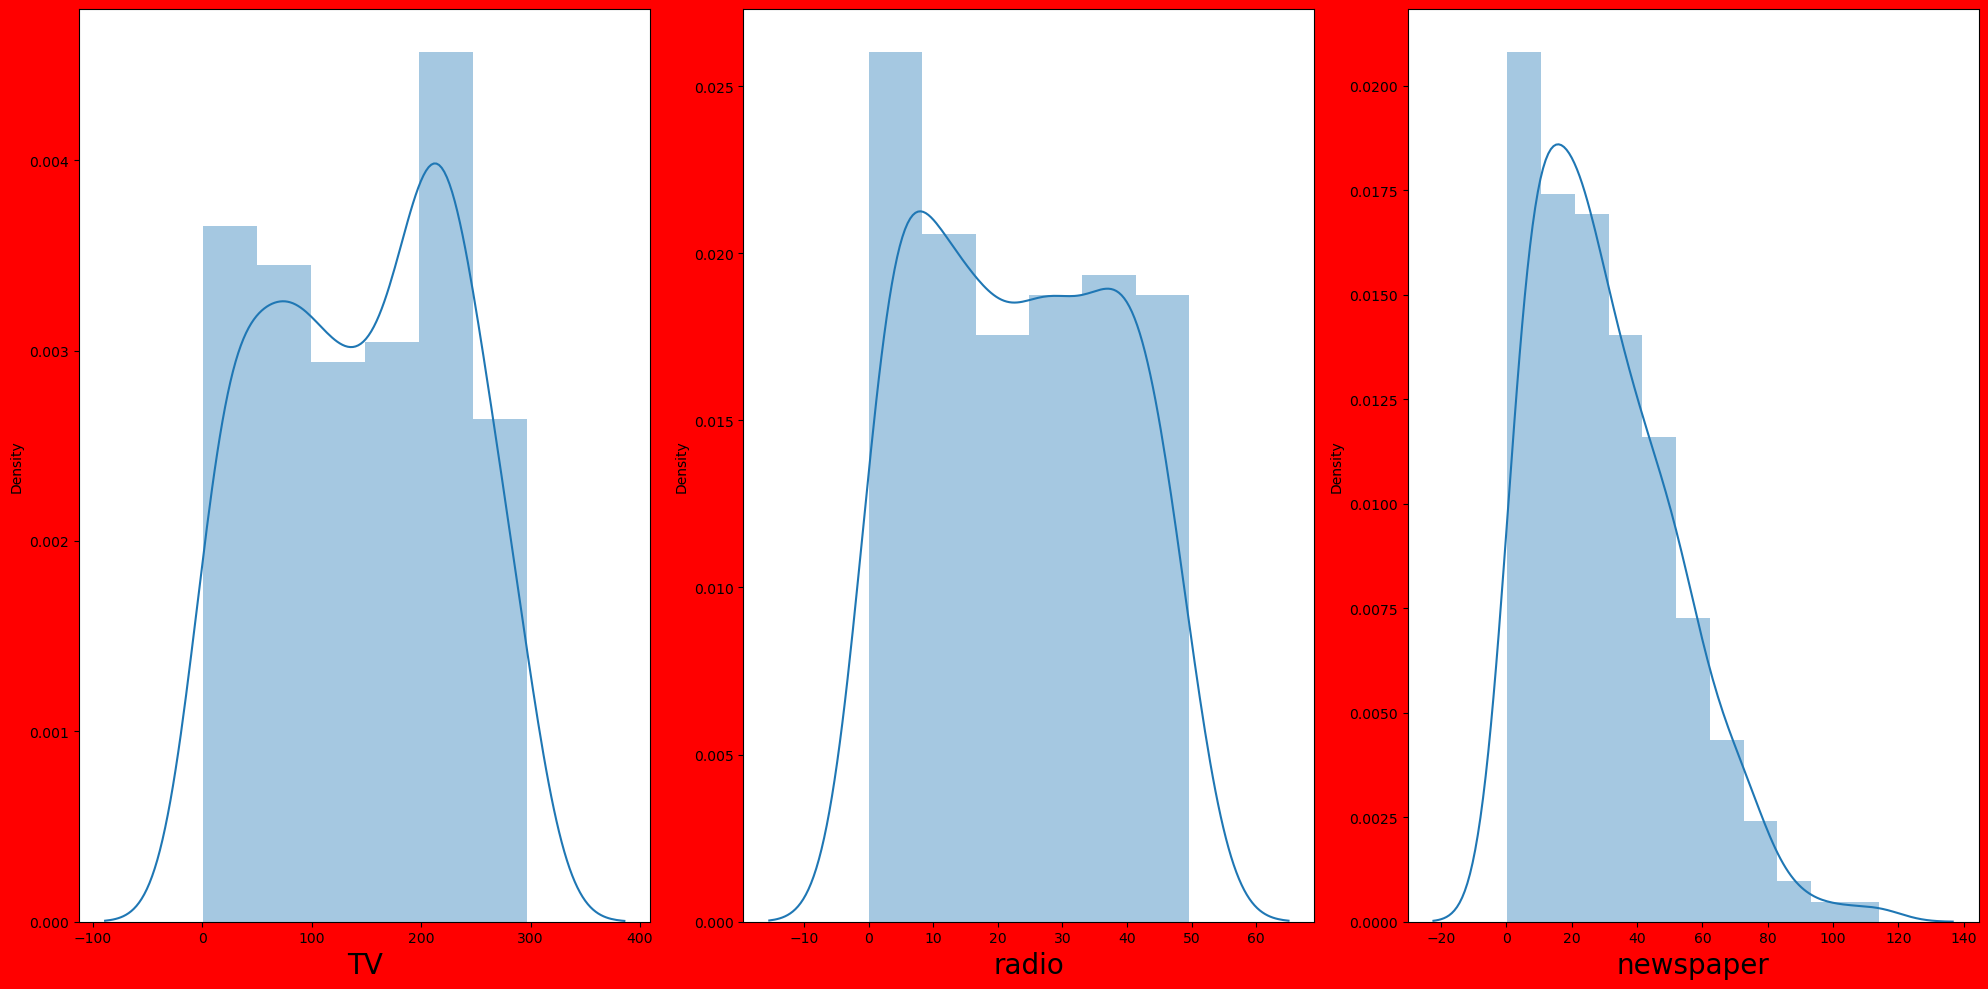

In [14]:
plt.figure(figsize=(20,10),facecolor='red')
plotnumber=1
for i in df:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()      

In [ ]:
# As we can see data is Normally distribtion in TV & radio and but skewness is there in newspaper so we check outliers

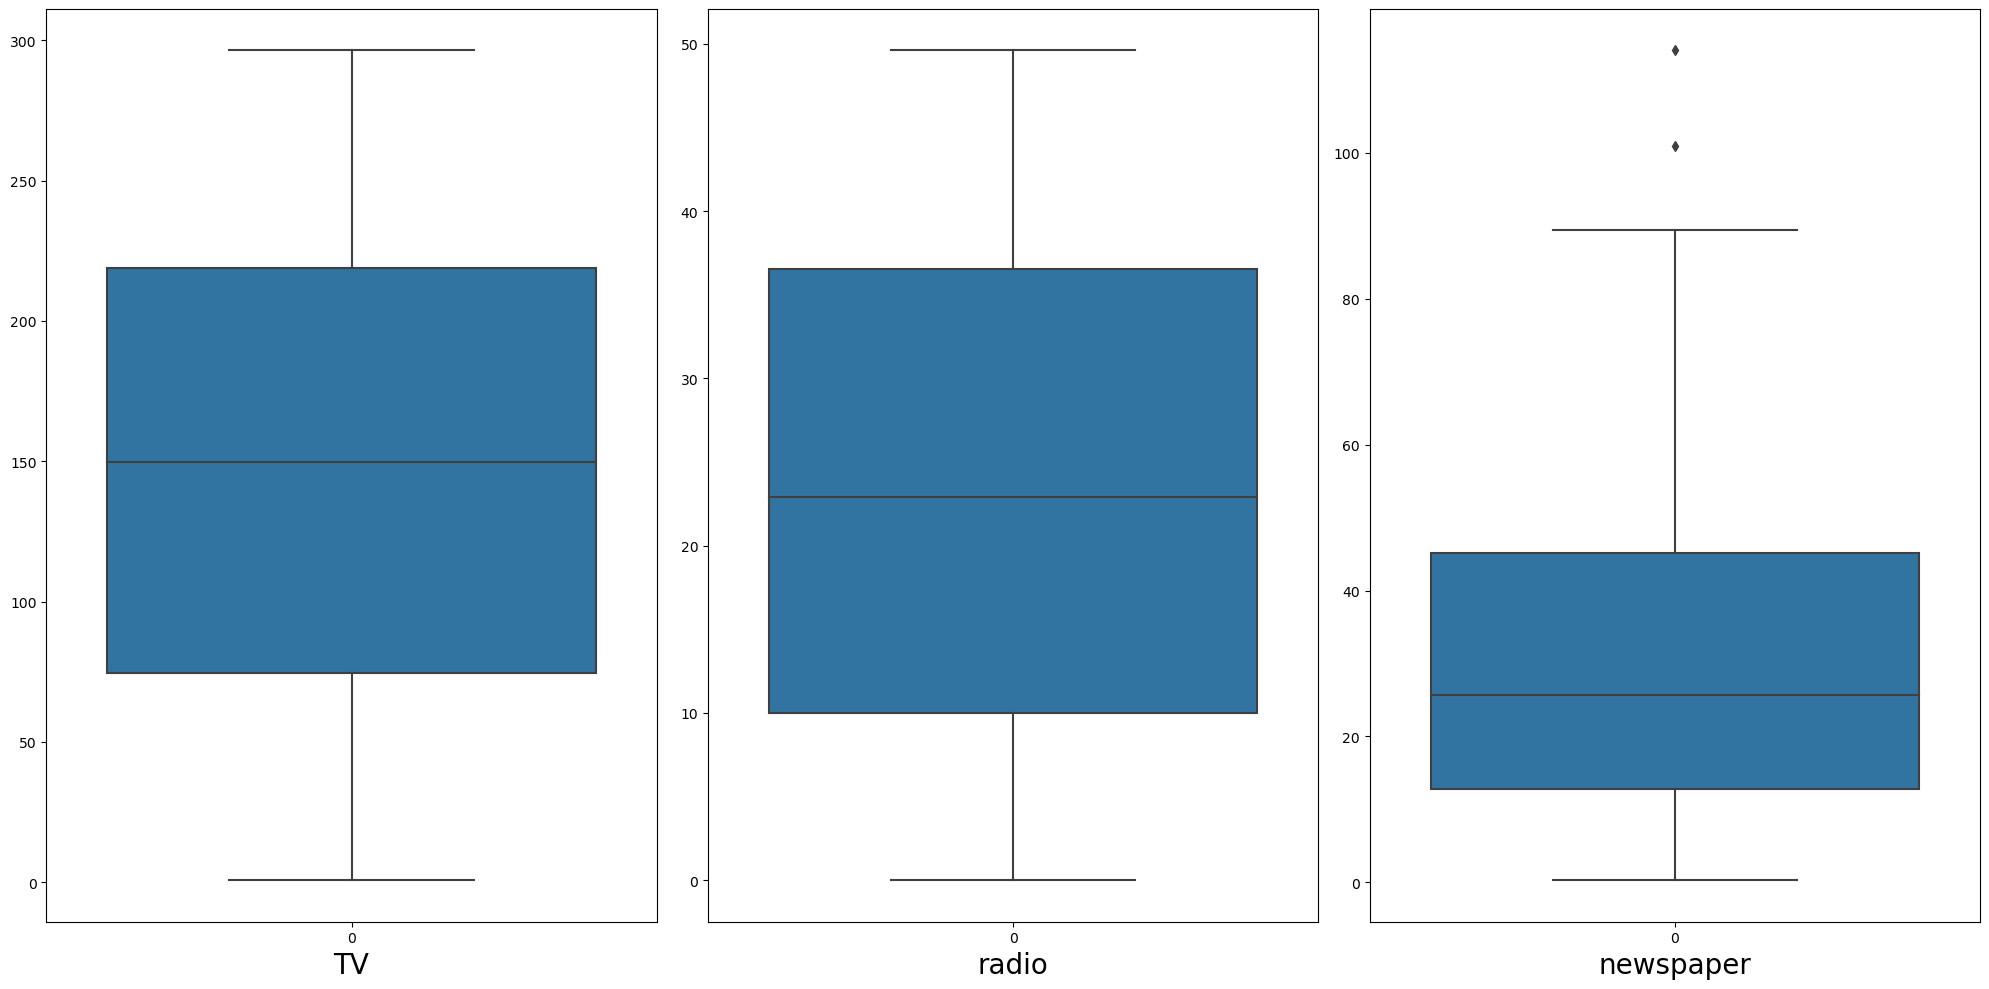

In [15]:
plt.figure(figsize=(20,10))
plotnumber=1
for i in df:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()      

In [ ]:
# We can see higher outliers in newspaper 

In [16]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [17]:
iqr

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64

In [18]:
higher_outlier=(q3.newspaper + (1.5*iqr.newspaper))
higher_outlier

93.625

In [ ]:
# Now we find the index of those data which are greater than 93.625

In [19]:
np_index=np.where(df['newspaper']>higher_outlier)
np_index

(array([ 16, 101], dtype=int64),)

In [20]:
df=df.drop(df.index[np_index])
df.shape

(198, 4)

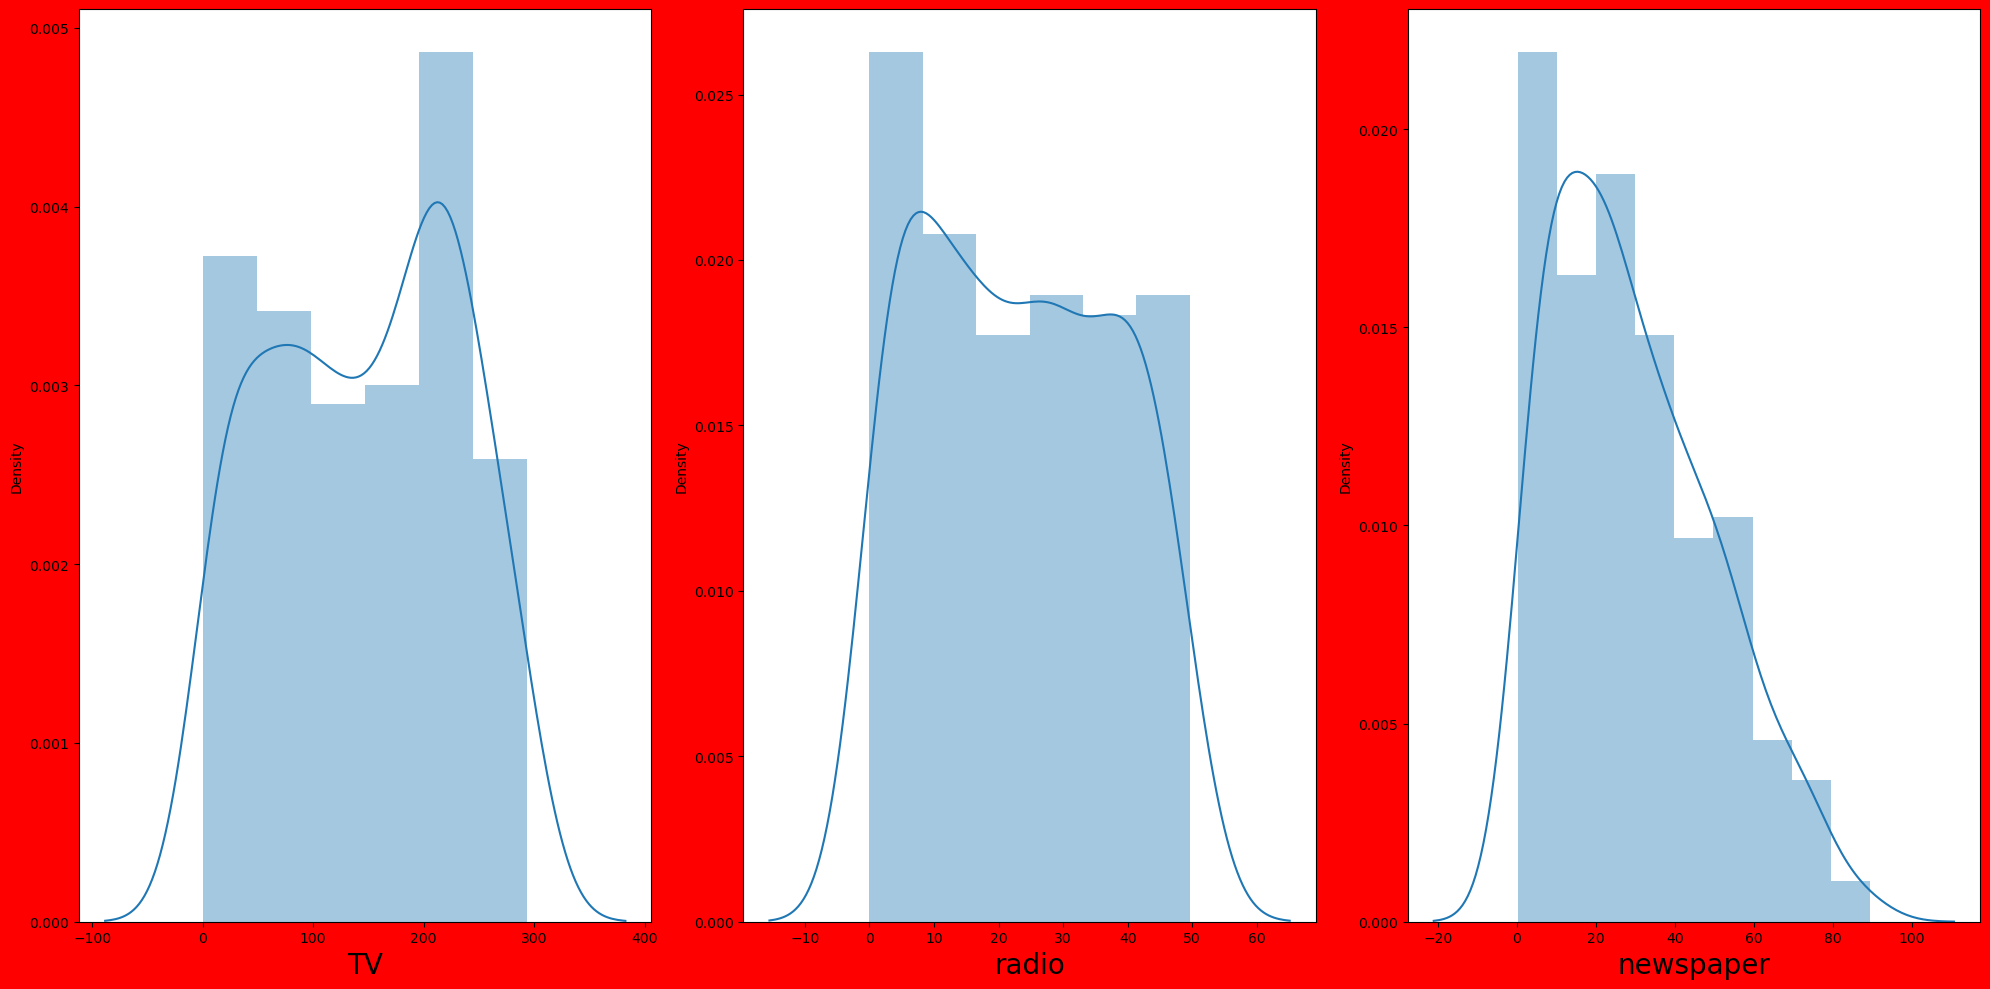

In [21]:
plt.figure(figsize=(20,10),facecolor='red')
plotnumber=1
for i in df:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()      

In [ ]:
# Now we go for feature selection 

In [22]:
x=df.drop(['sales'],axis=1)
y=df.sales

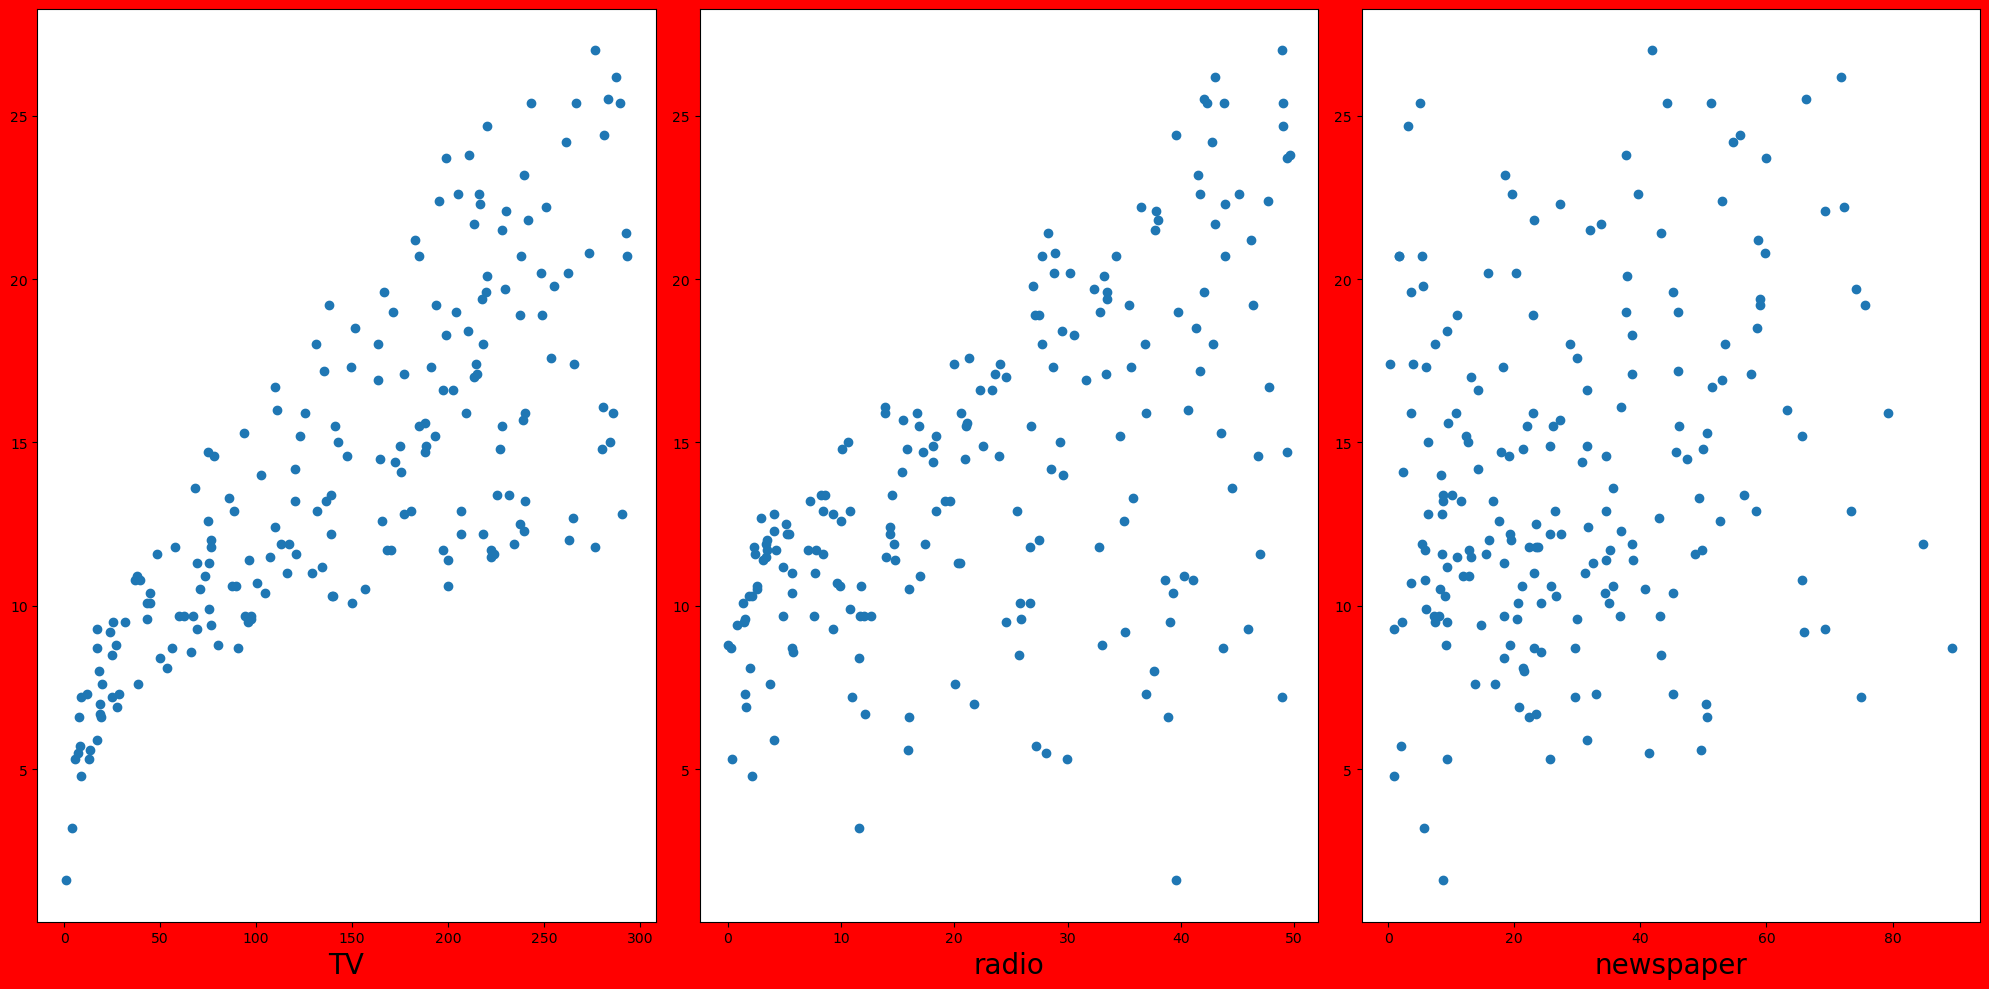

In [18]:
plt.figure(figsize=(20,10),facecolor='red')
plotnumber=1
for i in df:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        plt.scatter(df[i],y)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()      

In [ ]:
# in above graph we can observe observe newspaper has no significant relation with the sales but we can not conclude we should
# take soem more proff.

In [23]:
# Model initialization and training
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [25]:
print('Intercept', lm.intercept_)
print('TV',lm.coef_[0])
print('Radio',lm.coef_[1])
print('Newspaper',lm.coef_[2])

Intercept 2.952308567118182
TV 0.045690341924578916
Radio 0.18855046885810486
Newspaper -0.0011776635581814687


In [ ]:
# now we have another proff that newspaper does not hav relation with the sales so take only 'TV' & 'Radio'

In [26]:
x=df[['TV','radio']]
y=df.sales
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [27]:
lm.fit(x,y)

LinearRegression()

In [28]:
y_pred=lm.predict(x)
y_pred

array([20.54885513, 12.35238176, 12.34602762, 17.6162718 , 13.22098014,
       12.52171199, 11.72429158, 12.10701892,  3.71911877, 12.54739176,
        7.04136762, 17.25107267, 10.61721115,  8.81414806, 18.4399789 ,
       20.82483246, 23.23069474,  9.94646209, 14.15334946, 18.11566407,
       14.73499106,  6.52354249, 16.53759611,  8.14612396, 15.59907869,
       14.96750819, 17.03903782, 19.39158238,  9.16445205, 21.63172097,
       11.35996257,  7.65369252, 18.82428619,  7.56637127, 16.98181583,
       23.3578813 , 15.63067807,  9.91972879, 20.43412507, 16.37417363,
       17.2960099 , 21.55090273, 13.96208299,  8.90947223, 15.16010263,
        8.89021499, 21.69210287, 16.28055542,  8.18706544, 12.64138776,
        9.322608  , 20.65618919, 19.958123  , 20.34613974, 21.30430362,
        8.54752471, 12.76272396, 21.88551026, 18.10230314,  5.75141286,
       22.89527447, 16.77690234, 13.18751492, 16.96635994,  7.83181554,
        8.99504178, 12.02077384, 18.94601161, 21.08804411, 17.77

In [ ]:
# Model evaluation

In [29]:
from sklearn.metrics import r2_score
met=r2_score(y,y_pred)
met

0.8953728420315047

In [30]:
df.to_csv(r"C:\Users\acer\OneDrive\Desktop\Adv_Reg_Prob.csv",index=False,header=True)